# Desafio Cientista de Dados - INDICIUM

Escolha das bibliotecas necessárias para cumprimir o desafio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

1. Descreva graficamente os dados disponíveis, apresentando as principais estatísticas descritivas. Comente o porquê da escolha dessas estatísticas.


In [2]:
df = pd.read_csv('treino.csv', sep=',')
df.head(10)
#abrindo e exlorando o dataset de treino

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure
5,8,L47187,L,298.1,308.6,1527,40.2,16,No Failure
6,9,M14868,M,298.3,308.7,1667,28.6,18,No Failure
7,11,H29424,H,298.4,308.9,1782,23.9,24,No Failure
8,12,H29425,H,298.6,309.1,1423,44.3,29,No Failure
9,16,L47195,L,298.6,309.2,1542,48.4,42,No Failure


In [3]:
df_teste = pd.read_csv('teste.csv', sep=',')
df_teste.head(10)
#abrindo e exlorando o dataset de teste

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
0,446,L47625,L,297.5,308.6,1793,26.7,70
1,7076,L54255,L,300.7,310.5,1536,47.4,192
2,1191,L48370,L,297.2,308.4,1460,42.1,41
3,2618,L49797,L,299.4,309.1,1670,35.9,68
4,5067,L52246,L,304.1,313.1,1550,30.9,9
5,191,L47370,L,298.2,308.4,1477,49.9,72
6,2601,L49780,L,299.3,309.0,1422,47.3,25
7,3300,L50479,L,301.3,310.5,1390,45.8,63
8,6729,L53908,L,301.5,310.9,1891,23.2,122
9,4824,L52003,L,303.5,311.9,1493,38.7,14


In [4]:
#adicionando nova coluna para predição

df_teste["failure_type"] = ''
df_teste.head(10)

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,446,L47625,L,297.5,308.6,1793,26.7,70,
1,7076,L54255,L,300.7,310.5,1536,47.4,192,
2,1191,L48370,L,297.2,308.4,1460,42.1,41,
3,2618,L49797,L,299.4,309.1,1670,35.9,68,
4,5067,L52246,L,304.1,313.1,1550,30.9,9,
5,191,L47370,L,298.2,308.4,1477,49.9,72,
6,2601,L49780,L,299.3,309.0,1422,47.3,25,
7,3300,L50479,L,301.3,310.5,1390,45.8,63,
8,6729,L53908,L,301.5,310.9,1891,23.2,122,
9,4824,L52003,L,303.5,311.9,1493,38.7,14,


In [5]:
df.shape

(6667, 9)

In [ ]:
df.info() #importante checar se há dados faltantes e o tipo de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB


In [6]:
df.describe() #propriedades estatísticas básicas do dataset

,udi,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,4994.589921,299.992515,309.992620,1537.419529,40.058512,108.098095
std,2896.125718,1.994710,1.488101,177.182908,9.950804,63.359915
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,2496.500000,298.300000,308.800000,1422.500000,33.200000,54.000000
50%,4983.000000,300.000000,310.000000,1503.000000,40.200000,108.000000
75%,7510.500000,301.500000,311.100000,1612.000000,46.800000,162.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,251.000000


In [7]:
df.info() #importante checar se há dados faltantes e o tipo de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB


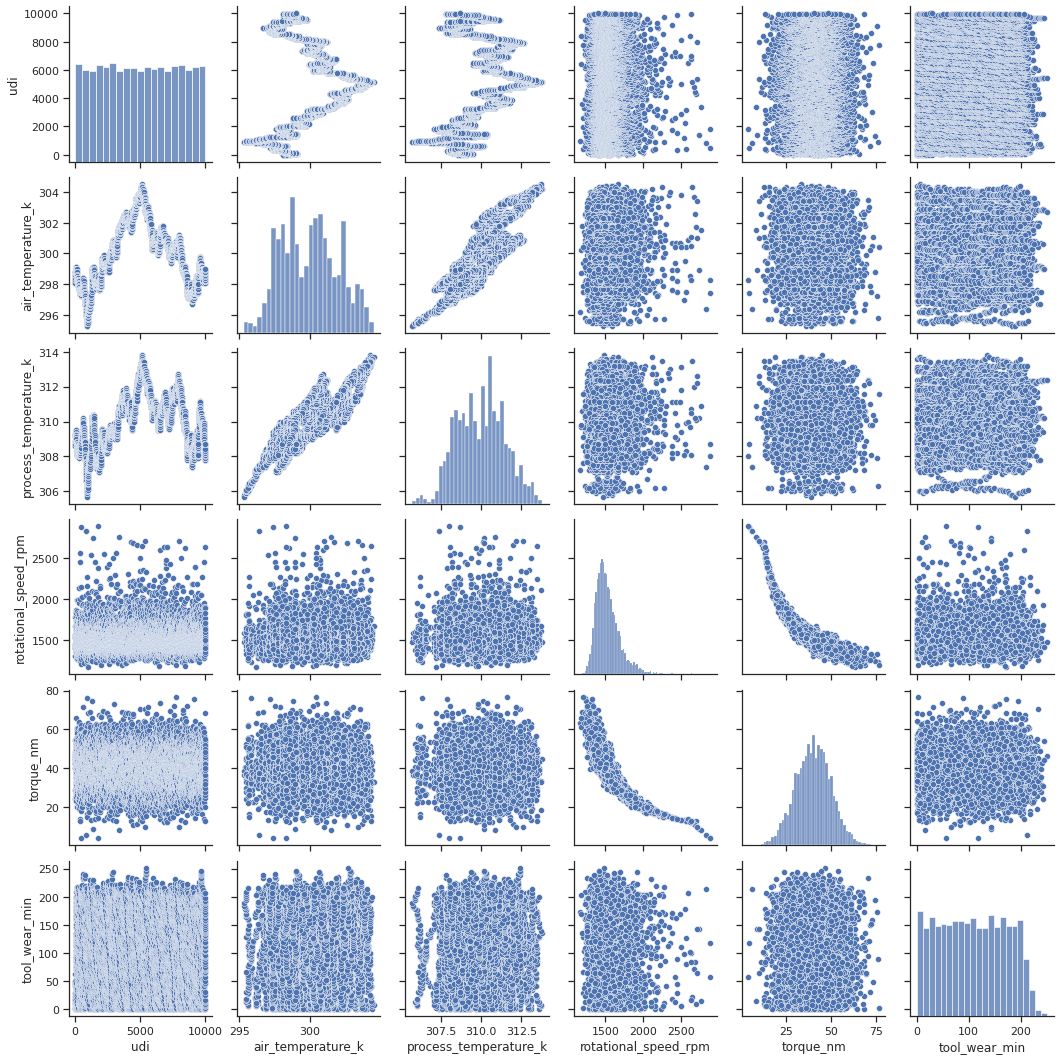

In [8]:
sns.set_theme(style="ticks")

sns.pairplot(df)
plt.show()

#Neste gráfico geral temos como visualizar como as variáveis estão relacionadas graficamente.

In [9]:
df.corr()#checando como as variáveis estão correlacionadas, valores mais próximos de 1 e -1 indcam alta correlação
#sinal de menos indica correlação negativa

,udi,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
udi,1.000000,0.118146,0.326561,0.004286,-0.003398,-0.002502
air_temperature_k,0.118146,1.000000,0.875724,0.035903,-0.023257,0.021078
process_temperature_k,0.326561,0.875724,1.000000,0.033379,-0.024457,0.020298
rotational_speed_rpm,0.004286,0.035903,0.033379,1.000000,-0.875989,-0.001290
torque_nm,-0.003398,-0.023257,-0.024457,-0.875989,1.000000,-0.004343
tool_wear_min,-0.002502,0.021078,0.020298,-0.001290,-0.004343,1.000000


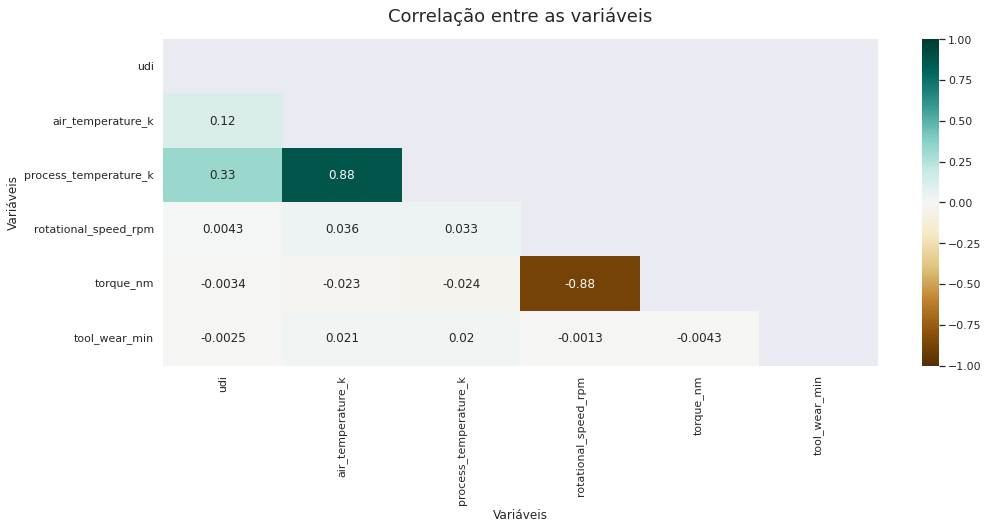

In [10]:
#Para facilitar a visualização escolhi um mapa de calor

sns.set_style('darkgrid')
plt.figure(figsize=(16, 6))

# definindo para ser triangular
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação entre as variáveis', fontdict={'fontsize':18}, pad=18)
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')
sns.set(font_scale=1.4)
plt.show()

2. Explique como você faria a previsão do tipo de falha a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


Este desafio pede uma análise preditiva usando regressão logistica.

 Primeiro escolhi as variáveis que mais contribuem para o output de previsão. Portanto, em vez de treinar o modelo usando todas as colunas do conjunto de dados, selecionei apenas aquelas que têm relação mais forte com o output que será previsto.

Usei a biblioteca SelectKBest para executar o teste estatístico qui-quadrado e selecionei as pricipais variáveis mais relacionadas

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Seleção de X e Y:

In [12]:
X= df.iloc[:,3:8] #variáveis métricas
Y= df.iloc[:,-1] #target output

Seecionei 3 variáveis mais relacionadas

In [13]:
var = SelectKBest(score_func=chi2, k=3)
fit= var.fit(X,Y)

Criei uma tabela com as variáveis e os seus scores :

In [14]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

In [15]:
var_scores= pd.concat([df_columns, df_scores], axis=1)
var_scores.columns= ['Variaveis', 'Score']
var_scores.sort_values(by = 'Score')


,Variaveis,Score
1,process_temperature_k,0.176356
0,air_temperature_k,1.682581
3,torque_nm,873.804438
2,rotational_speed_rpm,4426.250976
4,tool_wear_min,8327.846587


É possível ver na tabela acima que as variáveis torque_nm, rotational_speed_rpm e tool_wear_min são as mais relacionadas a failure_type

Construção do modelo: 

In [16]:
X= df[['torque_nm', 'rotational_speed_rpm', 'tool_wear_min']]
Y= df[['failure_type']]

Dividi o dataset de treino para checar posteriormente o modelo

tr = treino
te = teste

In [17]:
X_tr,X_te,y_tr,y_te=train_test_split(X,Y,test_size=0.4,random_state=100)

In [21]:
#regressão logistica
logreg = LogisticRegression()
logreg.fit(X_tr,y_tr)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predição dos dados de failure_type a partir da regressão logistica:

In [22]:
y_pred = logreg.predict(X_te)
print (X_te) # teste do dataset df (treino)
print (y_pred) #valores preditos


      torque_nm  rotational_speed_rpm  tool_wear_min
1136       35.9                  1530             68
4001       43.2                  1431              0
4997       41.8                  1511            205
6153       27.0                  1862            172
449        24.0                  1738            195
...         ...                   ...            ...
118        32.6                  1612             10
3447       29.6                  1696             65
379        40.4                  1437            117
4209       50.9                  1416            152
4904       48.7                  1357             96

[2667 rows x 3 columns]
['No Failure' 'No Failure' 'No Failure' ... 'No Failure' 'No Failure'
 'No Failure']


Avaliação da performance do modelo:
métricas de avaliação para a classificação: acurácia, revocação, precisão e F1 score

In [23]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [24]:
print('Accuracy:', metrics.accuracy_score(y_te, y_pred))


Accuracy: 0.9662542182227222


In [25]:
print('Recall:', metrics.recall_score(y_te, y_pred, zero_division=1, average='weighted'))


Recall: 0.9662542182227222


In [26]:
print('Precision:', metrics.precision_score(y_te, y_pred, zero_division=1, average='weighted'))


Precision: 0.9647260686061558


In [27]:
print('CL Report:', metrics.classification_report(y_te, y_pred, zero_division=1))

CL Report:                           precision    recall  f1-score   support

Heat Dissipation Failure       1.00      0.00      0.00        33
              No Failure       0.97      1.00      0.98      2576
      Overstrain Failure       0.27      0.15      0.19        20
           Power Failure       1.00      0.00      0.00        23
         Random Failures       1.00      0.00      0.00         4
       Tool Wear Failure       1.00      0.00      0.00        11

                accuracy                           0.97      2667
               macro avg       0.87      0.19      0.20      2667
            weighted avg       0.96      0.97      0.95      2667



Desempenho do modelo em números é:

97% de Acurácia, Revocação e Precisão



#Realizando a predição dos dados:

In [ ]:
X_teste= df_teste[['torque_nm', 'rotational_speed_rpm', 'tool_wear_min']] #usando a tabela teste
Y_teste= df_teste[['failure_type']]

In [ ]:
y_pred=logreg.predict(X_teste)
print (X_teste) #teste
print (y_pred) #valores preditos



      torque_nm  rotational_speed_rpm  tool_wear_min
0          26.7                  1793             70
1          47.4                  1536            192
2          42.1                  1460             41
3          35.9                  1670             68
4          30.9                  1550              9
...         ...                   ...            ...
3328       59.7                  1306            172
3329       52.0                  1413             91
3330       38.5                  1481            181
3331       36.5                  1509             52
3332       27.7                  1687             95

[3333 rows x 3 columns]
['No Failure' 'No Failure' 'No Failure' ... 'No Failure' 'No Failure'
 'No Failure']


In [ ]:
type(y_pred)

numpy.ndarray

In [29]:
predito = pd.DataFrame(y_pred)

In [30]:
predito['rowNumber'] = predito.index

In [31]:
predito = predito.rename(columns = {0:'predictedValues'})

In [32]:
predito = predito.loc[:, ['rowNumber', 'predictedValues']]


In [33]:
display(predito)

,rowNumber,predictedValues
0,0,No Failure
1,1,No Failure
2,2,No Failure
3,3,No Failure
4,4,No Failure
...,...,...
2662,2662,No Failure
2663,2663,No Failure
2664,2664,No Failure
2665,2665,No Failure


In [35]:
predito.to_csv('Predicted.csv', sep=',', index=False)